In [1]:
import os
import ipyplot

from randepict import RandomDepictor

## Depict chemical structures with CDK, RDKit or Indigo

After calling an instance of RandomDepictor, depictions with randomly chosen parameters are created by calling the functions

- depict_and_resize_cdk(
      smiles: str, 
      image_shape: Tuple[int,int]
  )
- depict_and_resize_rdkit(
      smiles: str, 
      image_shape: Tuple[int,int]
  )
- depict_and_resize_indigo(
      smiles: str, 
      image_shape: Tuple[int,int]
  )


The SMILES string needs to be given, the image shape defaults to (299,299,3).

Each of these functions returns an np.array which represents an RGB image of the chemical structure.

_________________ CDK depictions _________________



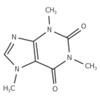
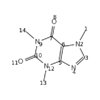
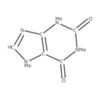
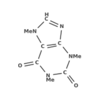
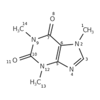
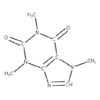
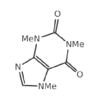
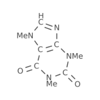
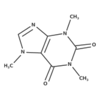
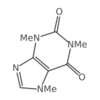


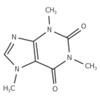
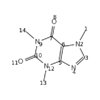
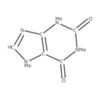
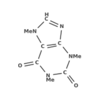
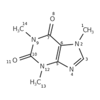
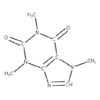
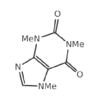
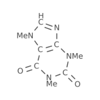
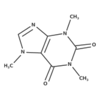
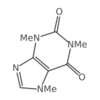

_________________ RDKit depictions _________________



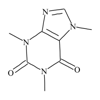
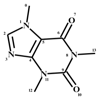
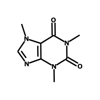
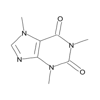
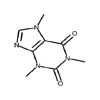
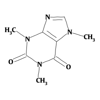
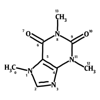
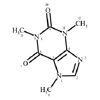
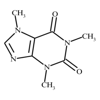
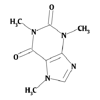


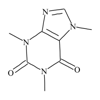
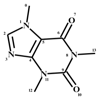
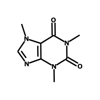
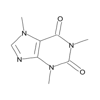
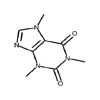
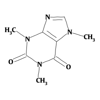
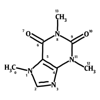
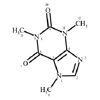
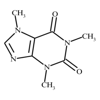
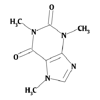

_________________ Indigo depictions _________________



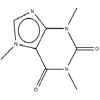
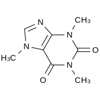
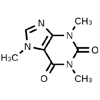
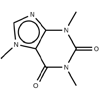
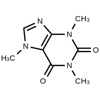
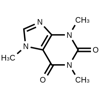
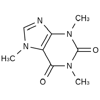
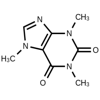
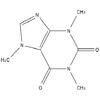
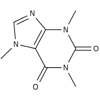


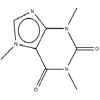
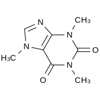
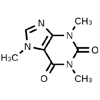
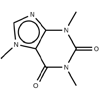
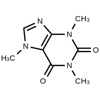
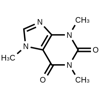
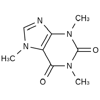
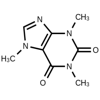
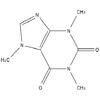
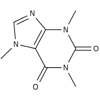

In [2]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
depiction_img_shape = (299,299)

# random_depictor can be called with a seed for reproducible results (defaults to 42)
with RandomDepictor(seed = 10) as depictor:
    # CDK depictions
    cdk_images = []
    for _ in range(10):
        cdk_images.append(depictor. depict_and_resize_cdk(smiles, depiction_img_shape))
    print("_________________", "CDK depictions", "_________________")
    ipyplot.plot_images(cdk_images, max_images=10, img_width=100)
    
    # RDKit Depictions
    rdkit_images = []
    for _ in range(10):
        rdkit_images.append(depictor.depict_and_resize_rdkit(smiles, depiction_img_shape))
    print("_________________", "RDKit depictions", "_________________")
    ipyplot.plot_images(rdkit_images, max_images=10, img_width=100)
    
    # Indigo Depictions
    indigo_images = []
    for _ in range(10):
        indigo_images.append(depictor.depict_and_resize_indigo(smiles, depiction_img_shape))
    print("_________________", "Indigo depictions", "_________________")
    ipyplot.plot_images(indigo_images, max_images=10, img_width=100)
    
    



## Depict chemical structures with a random toolkit

After calling an instance of RandomDepictor, the function
 
 - random_depiction(
       smiles: str, 
       image_shape: Tuple[int,int]
   )
 
The SMILES string needs to be given, the image_shape defaults to (299,299).

It returns an np.array which represents an RGB image of the chemical structure.


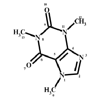
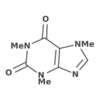
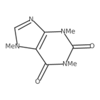
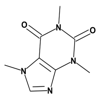
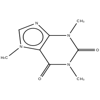
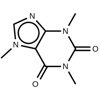
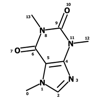
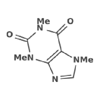
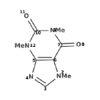
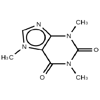
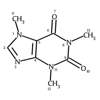
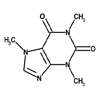
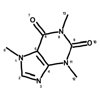
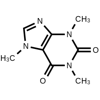
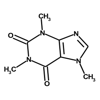
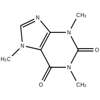
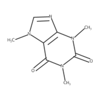
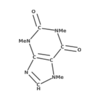
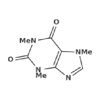
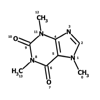


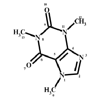
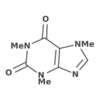
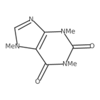
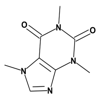
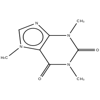
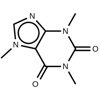
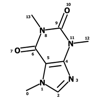
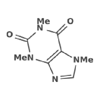
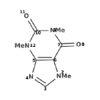
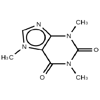
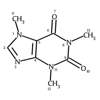
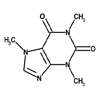
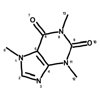
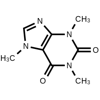
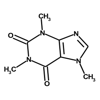
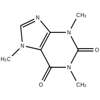
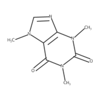
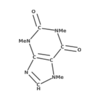
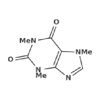
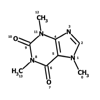

In [3]:
with RandomDepictor(42) as depictor:
    random_images = []
    for _ in range(20):
        random_images.append(depictor.random_depiction(smiles))

ipyplot.plot_images(random_images, max_images=20, img_width=100)

## Create random depictions with random augmentations

After calling an instance of RandomDepictor, this instance can simply be called as a function in order to generate a chemical structure depiction using CDK, RDKit or Indigo (randomly chosen) and apply random augmentations. The augmentations consist of random imgaug augmentations and randomly added chemical ID labels or curved arrows


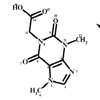
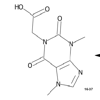
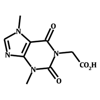
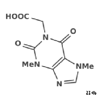
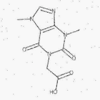
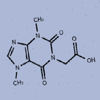
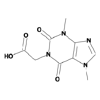
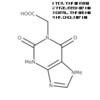
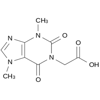
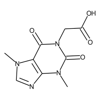
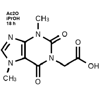
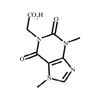
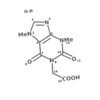
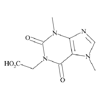
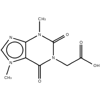
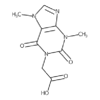
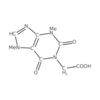
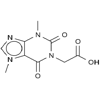
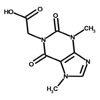
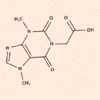


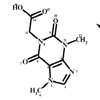
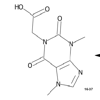
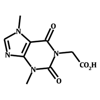
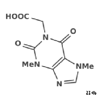
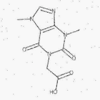
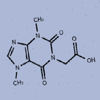
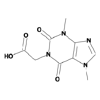
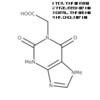
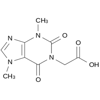
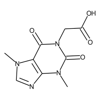
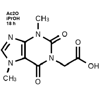
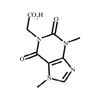
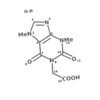
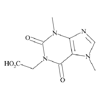
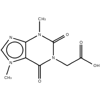
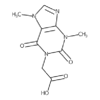
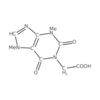
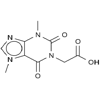
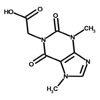
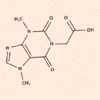

In [4]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor() as depictor:
    random_augmented_images = []
    for _ in range(20):
        random_augmented_images.append(depictor(smiles))
        

ipyplot.plot_images(random_augmented_images, max_images=20, img_width=100)

## 

## Create and save a batch of images

After calling an instance of RandomDepictor, simply call the method depict_save().

Args:

- smiles_list (List[str]): List of SMILES str
- images_per_structure (int): Amount of images to create per SMILES str
- output_dir (str): Output directory 
- augment (bool): Boolean that indicates whether or not to use augmentations
- ID_list (List[str]): List of IDs (should be as long as smiles_list)
- shape (Tuple[int, int], optional): image shape. Defaults to (299, 299).
- processes (int, optional): Number of parallel threads. Defaults to 4.
- seed (int, optional): Seed for pseudo-random decisions. Defaults to 42.

In [5]:
# Make sure the output directories exist
if not os.path.exists('not_augmented'):
        os.mkdir('not_augmented')
        
if not os.path.exists('augmented'):
        os.mkdir('augmented')

# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(42) as depictor:
    depictor.batch_depict_save([smiles], 20, 'not_augmented', False, ['caffeine'], (299, 299), 5)
    depictor.batch_depict_save([smiles], 20, 'augmented', True, ['caffeine'], (299, 299), 5)

## Create a batch of images while ensuring diversity using feature fingerprints


After calling an instance of RandomDepictor, simply call the method batch_depict_with_fingerprints().

Args:

- smiles_list: List[str]
- images_per_structure: int
- indigo_proportion: float = 0.15
- rdkit_proportion: float = 0.3
- cdk_proportion: float = 0.55
- aug_proportion: float = 0.5
- shape: Tuple[int, int] = (299, 299)
- processes: int = 4
- seed: int = 42

* Note: Have a look at examples/generate_depiction_grids_with_fingerprints.py to see how this function was used to generate the grid figures from our publication.


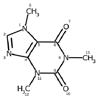
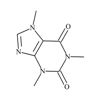
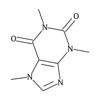
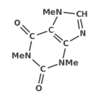
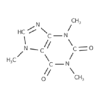
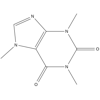
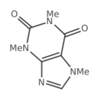
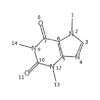
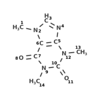
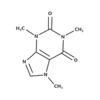
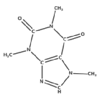
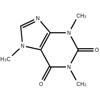
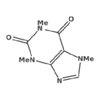
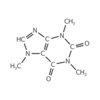
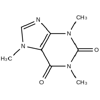
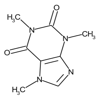
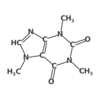
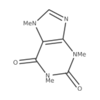
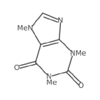
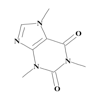
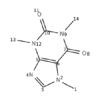
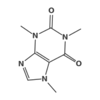
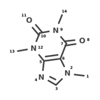
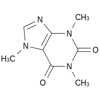
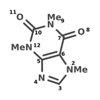
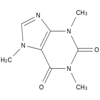
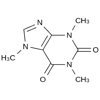
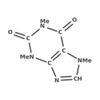
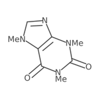
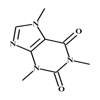
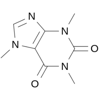
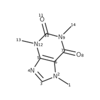
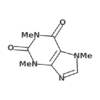
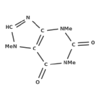
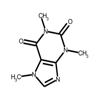
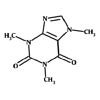
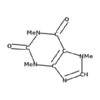
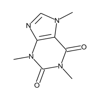
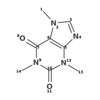
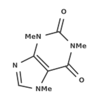
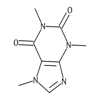
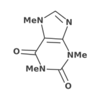
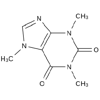
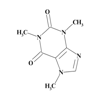
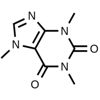
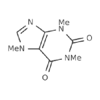
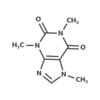
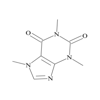
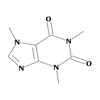
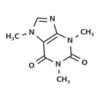
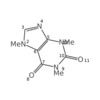
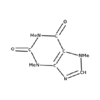
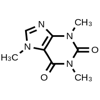
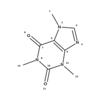
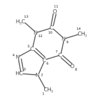
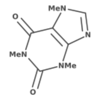
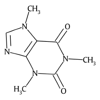
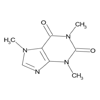
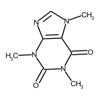
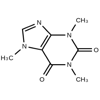
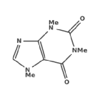
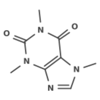
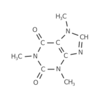
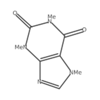
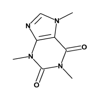
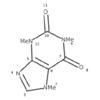
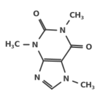
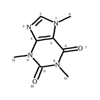
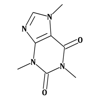
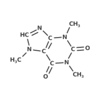
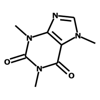
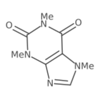
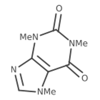
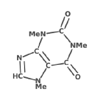
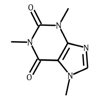
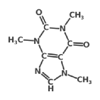
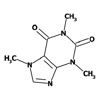
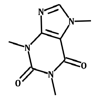
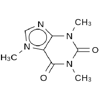
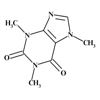
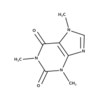
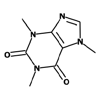
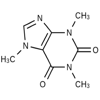
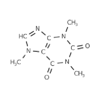
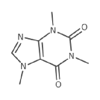
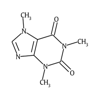
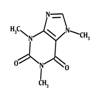
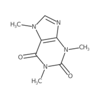
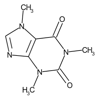
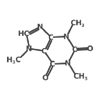
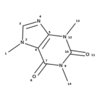
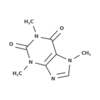
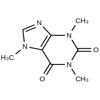
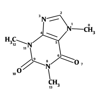
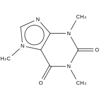
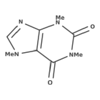
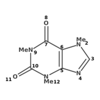
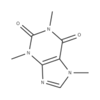
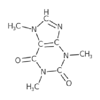
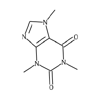


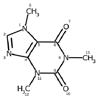
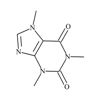
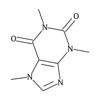
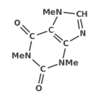
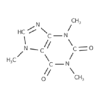
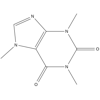
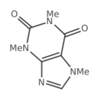
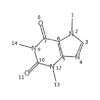
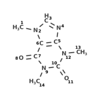
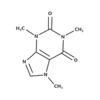
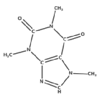
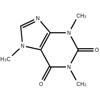
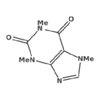
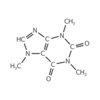
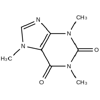
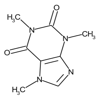
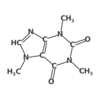
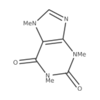
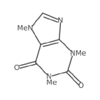
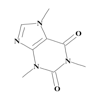
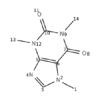
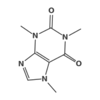
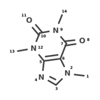
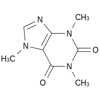
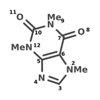
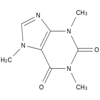
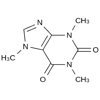
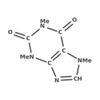
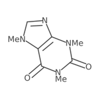
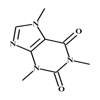
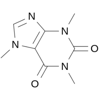
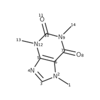
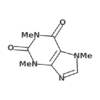
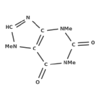
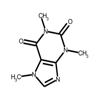
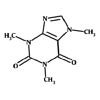
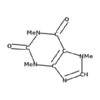
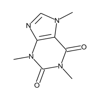
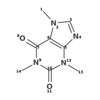
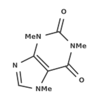
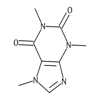
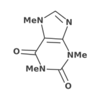
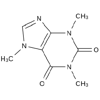
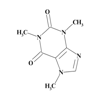
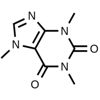
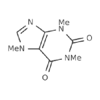
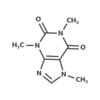
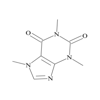
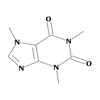
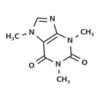
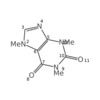
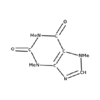
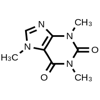
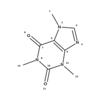
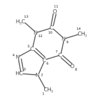
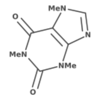
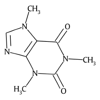
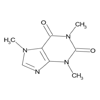
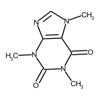
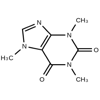
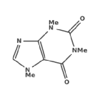
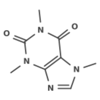
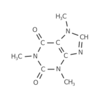
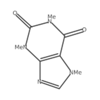
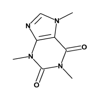
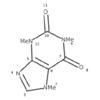
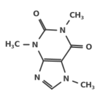
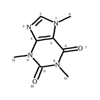
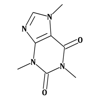
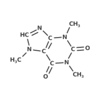
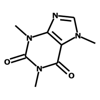
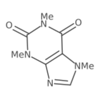
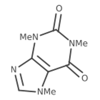
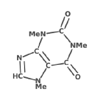
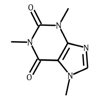
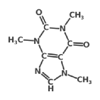
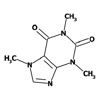
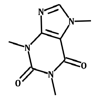
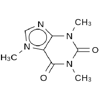
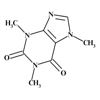
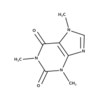
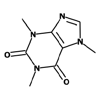
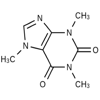
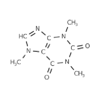
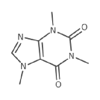
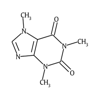
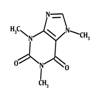
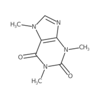
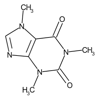
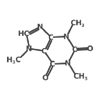
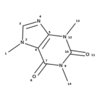
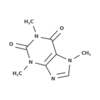
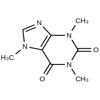
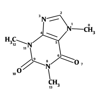
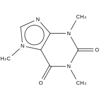
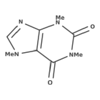
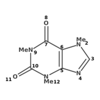
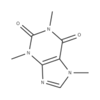
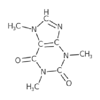
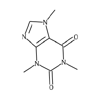


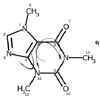
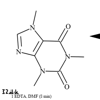
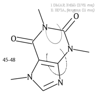
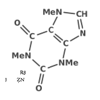
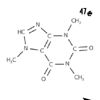
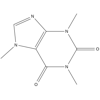
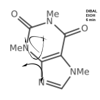
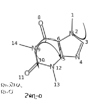
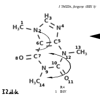
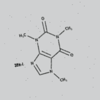
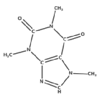
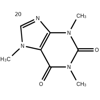
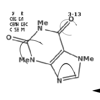
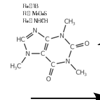
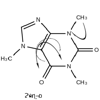
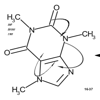
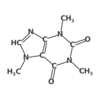
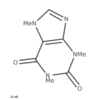
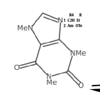
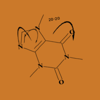
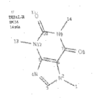
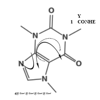
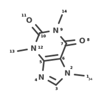
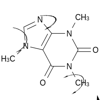
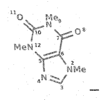
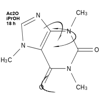
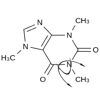
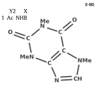
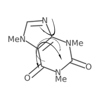
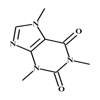
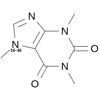
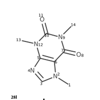
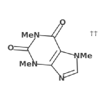
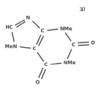
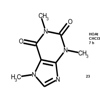
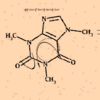
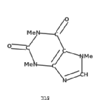
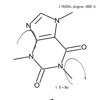
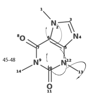
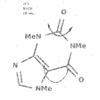
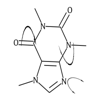
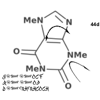
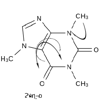
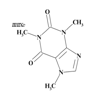
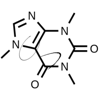
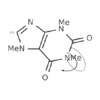
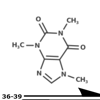
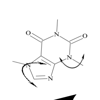
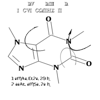
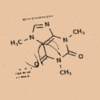
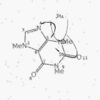
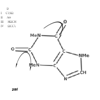
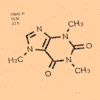
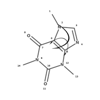
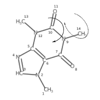
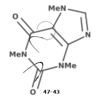
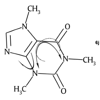
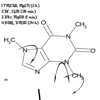
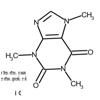
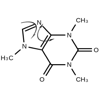
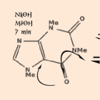
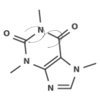
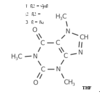
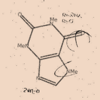
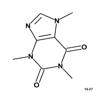
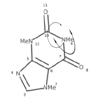
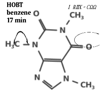
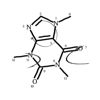
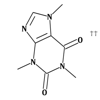
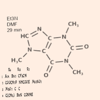
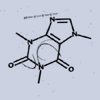
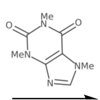
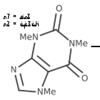
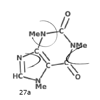
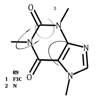
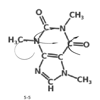
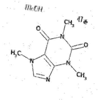
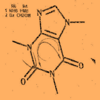
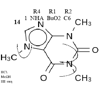
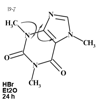
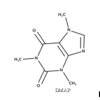
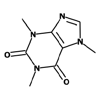
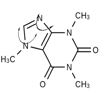
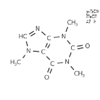
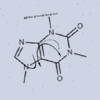
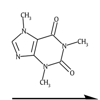
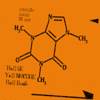
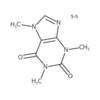
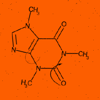
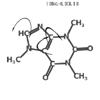
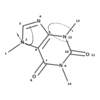
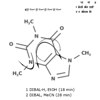
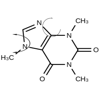
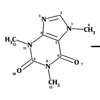
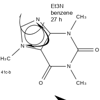
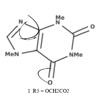
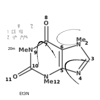
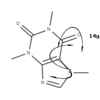
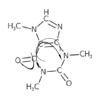
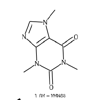


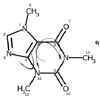
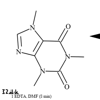
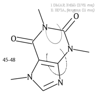
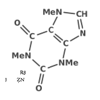
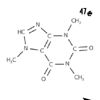
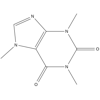
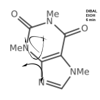
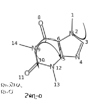
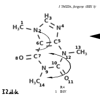
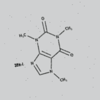
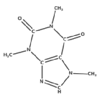
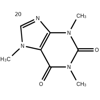
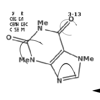
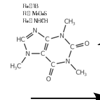
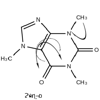
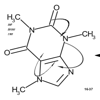
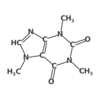
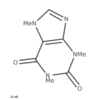
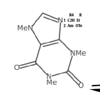
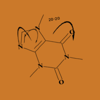
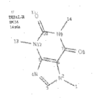
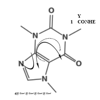
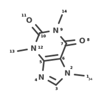
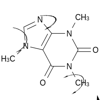
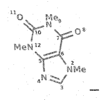
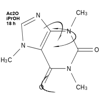
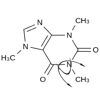
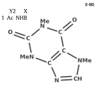
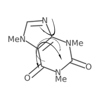
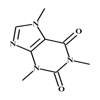
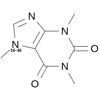
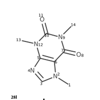
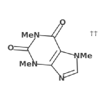
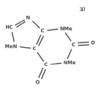
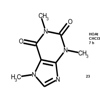
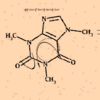
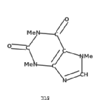
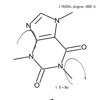
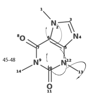
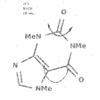
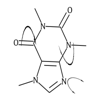
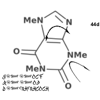
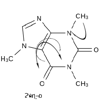
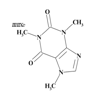
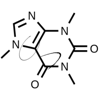
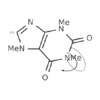
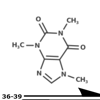
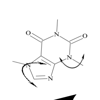
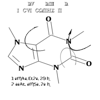
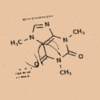
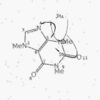
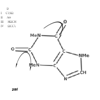
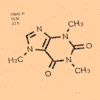
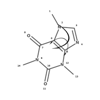
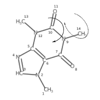
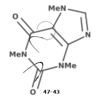
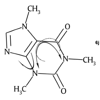
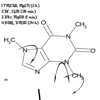
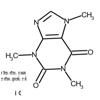
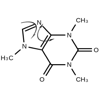
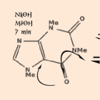
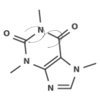
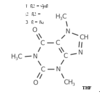
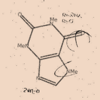
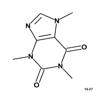
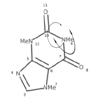
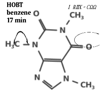
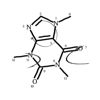
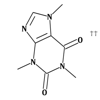
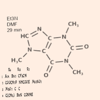
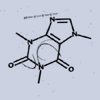
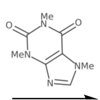
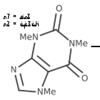
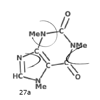
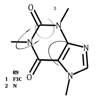
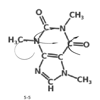
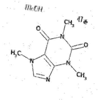
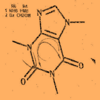
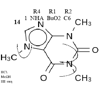
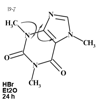
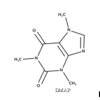
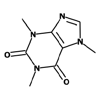
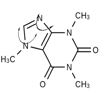
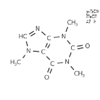
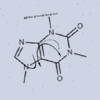
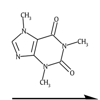
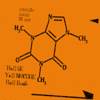
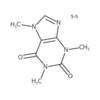
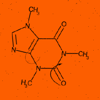
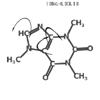
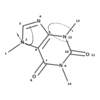
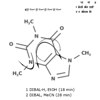
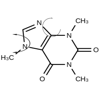
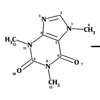
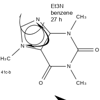
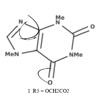
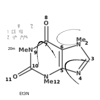
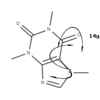
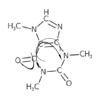
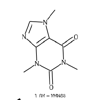

In [6]:
# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"

with RandomDepictor(42) as depictor:
    fp_depictions = depictor.batch_depict_with_fingerprints([smiles],
                                                         100,
                                                         aug_proportion = 0)
    fp_aug_depictions = depictor.batch_depict_with_fingerprints([smiles],
                                                         100,
                                                         aug_proportion = 1)
ipyplot.plot_images(fp_depictions, max_images=100, img_width=100)
ipyplot.plot_images(fp_aug_depictions, max_images=100, img_width=100)

## Create and save a batch of images while ensuring diversity using feature fingerprints


After calling an instance of RandomDepictor, simply call the method batch_depict_save_with_fingerprints().

Args:

- smiles_list: List[str]
- images_per_structure: int
- output_dir: str
- ID_list: List[str]
- indigo_proportion: float = 0.15
- rdkit_proportion: float = 0.3
- cdk_proportion: float = 0.55
- aug_proportion: float = 0.5
- shape: Tuple[int, int] = (299, 299)
- processes: int = 4
- seed: int = 42


*Note: The images that are created here, were used for the animations in the GitHub repository

In [7]:
# Make sure the output directories exist
if not os.path.exists('not_augmented_fingerprint'):
        os.mkdir('not_augmented_fingerprint')
        
if not os.path.exists('augmented_fingerprint'):
        os.mkdir('augmented_fingerprint')

# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(42) as depictor:
    depictor.batch_depict_save_with_fingerprints([smiles], 
                                                 100, 
                                                 'not_augmented_fingerprint',
                                                ['caffeine_{}'.format(n) for n in range(100)],
                                                aug_proportion = 0)
    depictor.batch_depict_save_with_fingerprints([smiles], 
                                                 100, 
                                                 'augmented_fingerprint',
                                                ['caffeine_{}'.format(n) for n in range(100)],
                                                aug_proportion = 1)

## Generating synthethic hand-drawn like images

Following the workflow proposed on [ChemPix: automated recognition of hand-drawn hydrocarbon structures using deep learning](https://pubs.rsc.org/en/content/articlelanding/2021/SC/D1SC02957F) and openly available on Github by the Martinez Group at Stanford University; we have modified it to use it along with RanDepict.

The use is basically the same as described in on the examples before but adding the argument **hand_drawn = True** when calling the RandomDepictor class.

Here you have some examples:

/home/isabel/anaconda2/envs/DECIMER_IMGSEG/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



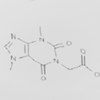
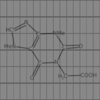
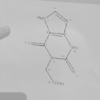
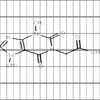
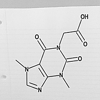
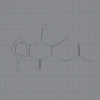
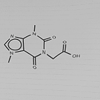
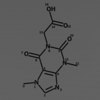
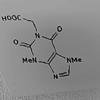
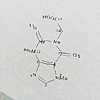
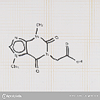
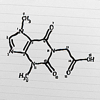
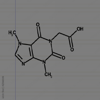
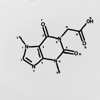
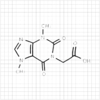
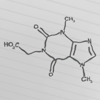
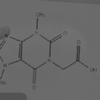
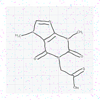
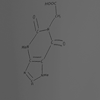
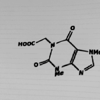


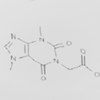
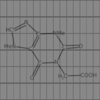
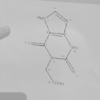
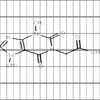
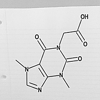
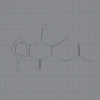
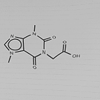
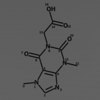
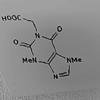
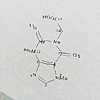
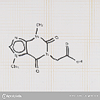
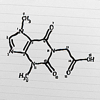
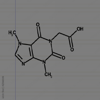
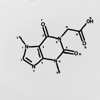
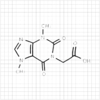
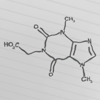
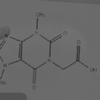
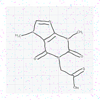
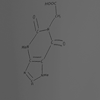
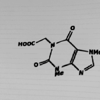

In [8]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(35, hand_drawn = True) as depictor:
    random_augmented_images = []
    for _ in range(20):
        random_augmented_images.append(depictor(smiles))
        

ipyplot.plot_images(random_augmented_images, max_images=20, img_width=100)

In [9]:
# Make sure the output directories exist
if not os.path.exists('not_augmented_fingerprint_hand_drawn'):
        os.mkdir('not_augmented_fingerprint_hand_drawn')

# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(42, hand_drawn = True) as depictor:
    depictor.batch_depict_save_with_fingerprints([smiles], 
                                                 100, 
                                                 'not_augmented_fingerprint_hand_drawn',
                                                ['caffeine_{}'.format(n) for n in range(100)],
                                                aug_proportion = 0)

/media/isabel/expansion/Jena/3_CNN_drawn_depicted/RanDepict/RanDepict/randepict_final.py:1781: UserWarning: not_augmented_fingerprint_hand_drawn/caffeine_4.png is a low contrast image
  sk_io.imsave(output_file_path, img_as_ubyte(image))
